# Useful Imports

In [12]:
import pandas as pd

# DataViz
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [13]:
transactions_1 = pd.read_csv('../data/transactions_1.csv')
transactions_1 = transactions_1.drop('Unnamed: 0', axis=1)
transactions_1

,customer_id,product_id,date
0,8649525,Opel,2017-01-31T09:31:08.873Z
1,8649525,Volkswagen,2017-02-03T16:59:16.610Z
2,8649525,Volkswagen,2017-02-05T19:47:55.353Z
3,8649525,Volkswagen,2017-02-05T19:48:14.633Z
4,8649525,Volkswagen,2017-02-06T09:59:49.053Z
...,...,...,...
499995,8822663,Fiat,2019-12-17T10:15:10.907Z
499996,8822663,Renault,2017-09-26T08:00:46.090Z
499997,8822663,Renault,2017-09-26T08:17:36.350Z
499998,8822663,Renault,2017-09-26T09:05:09.700Z


In [14]:
transactions_2 = pd.read_csv('../data/transactions_2.csv')
transactions_2 = transactions_2.drop('Unnamed: 0', axis=1)
transactions_2

,customer_id,product_id,date
0,8822663,Abarth,2018-06-28T09:19:11.130Z
1,8822663,Peugeot,2019-07-17T08:06:29.500Z
2,8822663,Nissan,2017-06-22T07:29:22.440Z
3,8822663,Nissan,2017-06-22T07:50:10.863Z
4,8822663,Nissan,2017-06-22T08:40:35.923Z
...,...,...,...
475950,1111821,Renault,2019-05-17T10:06:43.037Z
475951,4232782,Renault,2017-10-27T17:49:54.483Z
475952,4746355,Seat,2019-01-09T16:31:08.133Z
475953,4743766,Opel,2017-03-29T16:25:05.907Z


In [15]:
transactions = pd.concat([transactions_1, transactions_2], axis=0)
transactions

,customer_id,product_id,date
0,8649525,Opel,2017-01-31T09:31:08.873Z
1,8649525,Volkswagen,2017-02-03T16:59:16.610Z
2,8649525,Volkswagen,2017-02-05T19:47:55.353Z
3,8649525,Volkswagen,2017-02-05T19:48:14.633Z
4,8649525,Volkswagen,2017-02-06T09:59:49.053Z
...,...,...,...
475950,1111821,Renault,2019-05-17T10:06:43.037Z
475951,4232782,Renault,2017-10-27T17:49:54.483Z
475952,4746355,Seat,2019-01-09T16:31:08.133Z
475953,4743766,Opel,2017-03-29T16:25:05.907Z


# Check Data Quality

In [16]:
# Missing values
transactions.isnull().sum()

customer_id    0
product_id     0
date           0
dtype: int64

In [17]:
# Duplicates
print(transactions[transactions.duplicated(keep=False)])
transactions = transactions.drop_duplicates()

        customer_id  product_id                      date
324723      1525871  Volkswagen  2017-10-19T08:15:47.840Z
324724      1525871  Volkswagen  2017-10-19T08:15:47.840Z
314552      6648127        Seat  2017-10-03T08:59:33.800Z
314553      6648127        Seat  2017-10-03T08:59:33.800Z
393455      2143682     Peugeot  2018-01-22T10:12:38.647Z
393456      2143682     Peugeot  2018-01-22T10:12:38.647Z


In [18]:
# Data types
print(transactions.dtypes)
transactions["date"] = pd.to_datetime(transactions["date"], errors="coerce")
print(transactions.dtypes)

customer_id     int64
product_id     object
date           object
dtype: object
customer_id                  int64
product_id                  object
date           datetime64[ns, UTC]
dtype: object


C:\Users\moote\AppData\Local\Temp\ipykernel_15532\2456763853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["date"] = pd.to_datetime(transactions["date"], errors="coerce")


In [19]:
# Date range
print(f"Date min : {transactions['date'].min()}")
print(f"Date max : {transactions['date'].max()}")

Date min : 2017-01-01 08:32:26.307000+00:00
Date max : 2020-03-17 00:08:21.430000+00:00


## Transactions per customer

customer_id
8649525    34963
1242611    33355
9467115    18927
1618902    13450
1435341    10490
           ...  
3512672        1
3158048        1
6014572        1
4743766        1
1249075        1
Name: count, Length: 2002, dtype: int64
count     2002.000000
mean       487.488511
std       1557.581049
min          1.000000
25%         20.250000
50%        103.000000
75%        394.000000
max      34963.000000
Name: count, dtype: float64


Text(0.5, 1.0, 'Transaction Frequency per Customer')

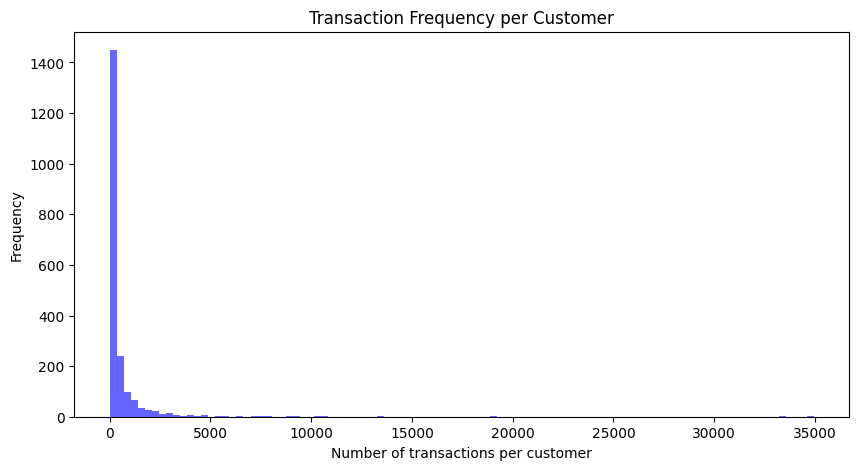

In [20]:
transactions_per_customer = transactions["customer_id"].value_counts()
print(transactions_per_customer)
print(transactions_per_customer.describe())

# Histogram
plt.figure(figsize=(10, 5))
plt.hist(transactions_per_customer, bins=100, density=False, alpha=0.6, color='b')
plt.xlabel("Number of transactions per customer")
plt.ylabel("Frequency")
plt.title("Transaction Frequency per Customer")

The customers have different behaviour regarding the frequency of transactions. Customer segmentation can be relevant in this case.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '8649525'),
  Text(1, 0, '1242611'),
  Text(2, 0, '9467115'),
  Text(3, 0, '1618902'),
  Text(4, 0, '1435341'),
  Text(5, 0, '5741989'),
  Text(6, 0, '8423804'),
  Text(7, 0, '4893343'),
  Text(8, 0, '6026638'),
  Text(9, 0, '5102428')])

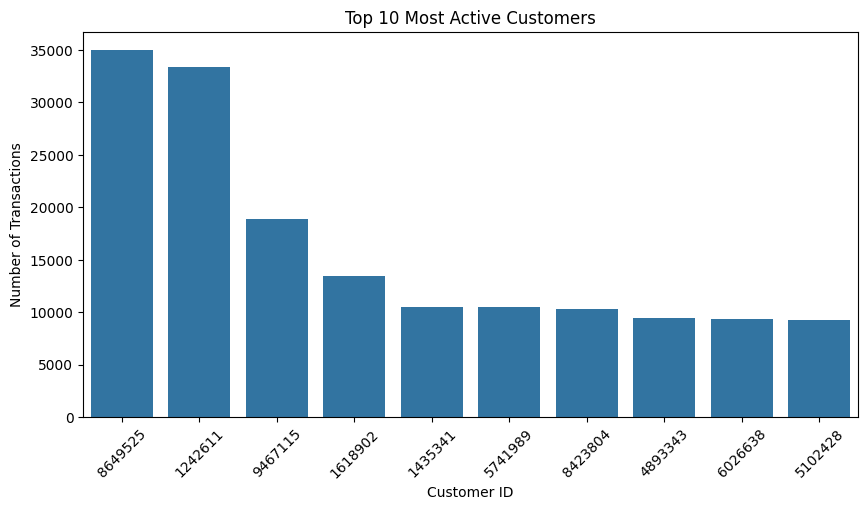

In [58]:
transactions_per_customer = transactions_per_customer.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=transactions_per_customer.index[:10], y=transactions_per_customer.values[:10], order=transactions_per_customer.index[:10])
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.title("Top 10 Most Active Customers")
plt.xticks(rotation=45)

# Data Analysis

In [21]:
print(f"Number of unique customers: {transactions['customer_id'].nunique()}")
print(f"Number of unique products: {transactions['product_id'].nunique()}")

Number of unique customers: 2002
Number of unique products: 50


## Transactions per product

In [34]:
transactions_per_product = transactions["product_id"].value_counts()
print(transactions_per_product)

product_id
Renault            201916
Volkswagen          87189
Peugeot             85550
Opel                82930
Audi                70418
BMW                 57626
Toyota              52725
Nissan              46581
Ford                42723
Seat                42565
Citroen             41003
Mercedes Benz       36963
Abarth              29438
Fiat                17953
Volvo               16905
Land Rover          14496
Skoda                8351
Hyundai              5510
Mini                 4797
Dacia                4786
Mazda                4218
Lexus                3058
Mitsubishi           2918
Kia                  2644
Porsche              1553
Jeep                 1495
Iveco                1471
Honda                1415
Infiniti             1295
Alfa Romeo           1188
Jaguar               1040
Chevrolet             771
Suzuki                609
Ssangyong             549
Lancia                517
Piaggio               208
Subaru                204
DS                     99
C

Some products have to be removed : Undefined, Not a make, ├ÅTS

## Transactions per month

C:\Users\moote\AppData\Local\Temp\ipykernel_15532\1139497186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["month"] = transactions["date"].dt.month


Text(0.5, 1.0, 'Transactions Over Time')

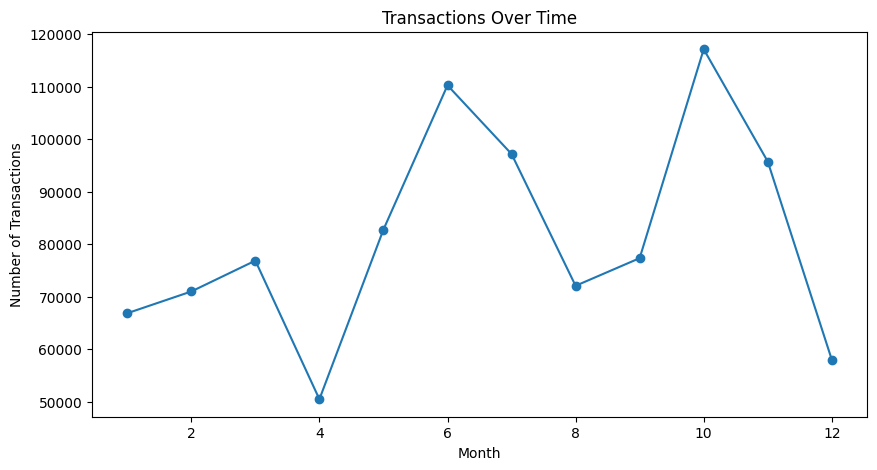

In [45]:
transactions["month"] = transactions["date"].dt.month
transactions_per_month = transactions.groupby("month").size()

plt.figure(figsize=(10, 5))
transactions_per_month.plot(kind="line", marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time")

## Transactions per year

C:\Users\moote\AppData\Local\Temp\ipykernel_15532\2623989490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["year"] = transactions["date"].dt.year


Text(0.5, 1.0, 'Transactions Over Time')

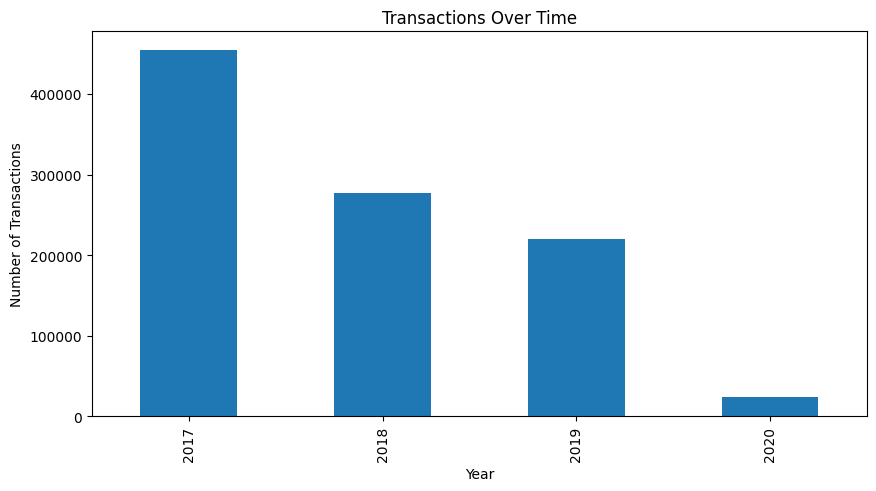

In [44]:
transactions["year"] = transactions["date"].dt.year
transactions_per_year = transactions.groupby("year").size()

plt.figure(figsize=(10, 5))
transactions_per_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time")

## Transactions per month for a specific year and product

Text(0.5, 1.0, 'Sales of Renault in 2018')

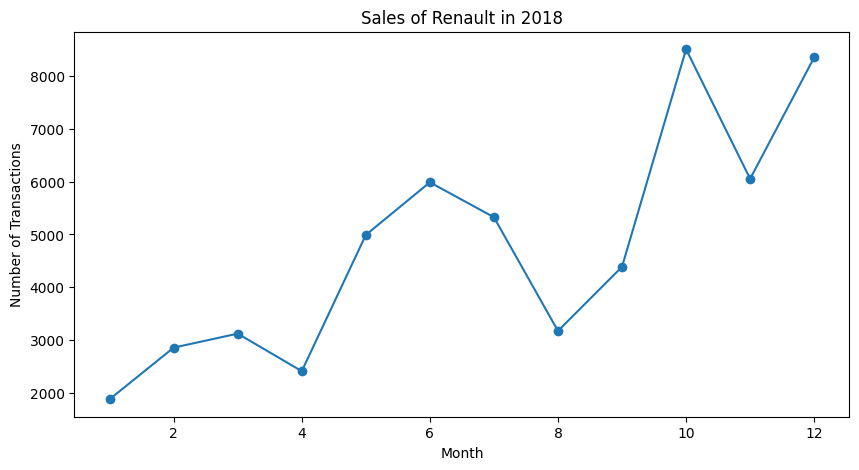

In [48]:
product_id = "Renault"
year = 2018
product_sales = transactions[(transactions["product_id"] == product_id) & (transactions["year"] == year)].groupby("month").size()

plt.figure(figsize=(10, 5))
product_sales.plot(kind="line", marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title(f"Sales of {product_id} in {year}")